In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
#Necessary functions and libraries are imported

In [2]:
#Information Gain
#Information gain is used for determining the best features that render maximum information about a class.
#It is a property that measures how well a given attribute separates the training examples according to target classification.


##Gini İndex Decision Tree
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

targets = iris.target_names
print(targets)

['setosa' 'versicolor' 'virginica']


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = shuffle(df)#For randomize dataframe

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
112,6.8,3.0,5.5,2.1,2
43,5.0,3.5,1.6,0.6,0
102,7.1,3.0,5.9,2.1,2
149,5.9,3.0,5.1,1.8,2
25,5.0,3.0,1.6,0.2,0


In [6]:
feature_cols = iris.feature_names
X = df[feature_cols] #Features
y = df.target #Target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
#25 percent of the data is split for testing and the rest for train.

In [8]:
#Train a Decision-Tree Classifier with Gini index. 
#Even if we didn't specify gini as a criterion here, gini would be applied according to the index
#Because it classifies according to gini as deault.

#Gini index calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly.
#It is a measure of purity of a node.
#If all the elements are linked with a single class then it is called pure.

#Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', max_depth=3) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

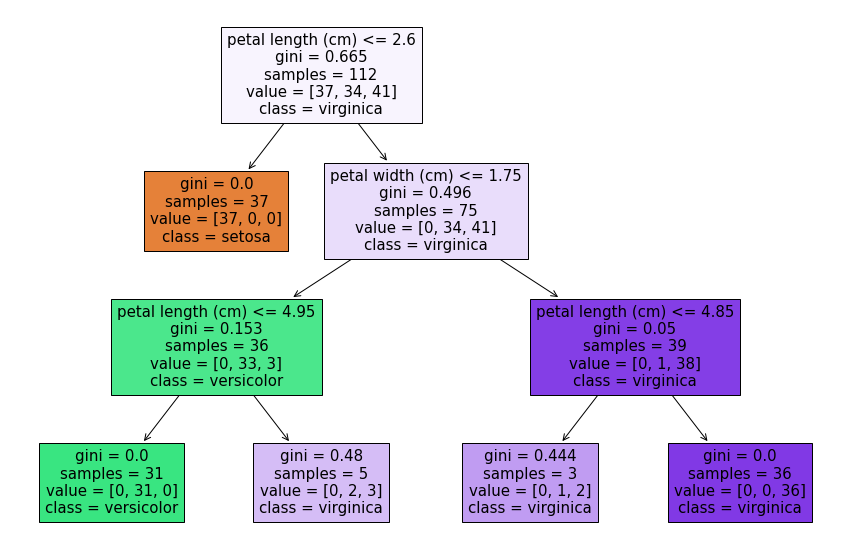

In [9]:
#Decision tree visualized
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [10]:
# Accuracy, Recall, Precision, f1 values calculated and confusion matrix created

# Accuracy= Accuracy describes how the model performs.
# We calculate this value to find out how well the model learns.
# Accuracy=TP+TN/(TP+FP+FN+TN)
# In this assignment, the accuracy value was calculated using the sklearn.metrics module.
accuracy_gini = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_gini)

# Recall=It describes to the proportion of total relevant results that the algorithm successfully classifies
# Recall= True Positive/(True Positive + False Negative)
# Recall is the model metric to choose best model.
# In this assignment, the recall score was calculated using the sklearn.metrics module.
recall_gini = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall_gini)

# Precision=It specifies to the percentage of relevant results that the algorithm successfully classifies
# Precision is a score to which estimates from different samples are similar.
# Precision = True Positive/(True Positive + False Positive)
# In this assignment, the precision score was calculated using the sklearn.metrics module.
precision_gini = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision_gini)

# F1 Score=It is a statistic that is the harmonic mean of precision and recall. 
# F1 Score is a measure of a model's accuracy on a dataset. 
# F1 Score= (2*Precision *Recall)/(Precision + Recall)
# In this assignment, the F1 score was calculated using the sklearn.metrics module.
f1_gini = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1_gini)

#Confusion Matrix:It is a metric used for finding the accuracy of a model, where the output can be of two or more categories.
#We create this matrix to describe the performance of a classification model.
# In this assignment, confusion matrix was created using the sklearn.metrics module.
confusion_gini = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_gini)

Accuracy: 0.9736842105263158
Recall: 0.9736842105263158
Precision: 0.9752321981424149
F1 Score: 0.9733089408012008
Confusion Matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]


In [11]:
# Train a Decision-Tree Classifier with Entropy.
# Entropy is a measure of the purity of the sub split.
# It determines how a decision tree chooses to split data.

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

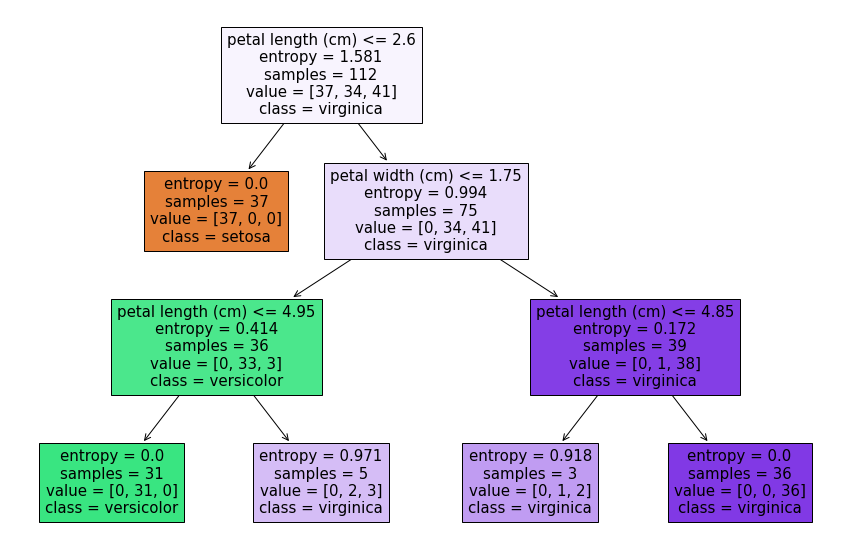

In [12]:
#Decision tree visualized
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [13]:
#Accuracy score calculated
accuracy_ent = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_ent)

#Recall score calculated
recall_ent = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall_ent)

#Precision score calculated
precision_ent = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision_ent)

#F1 score calculated
f1_ent = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1_ent)

#Confusion matrix created
confusion_ent = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_ent)

Accuracy: 0.9736842105263158
Recall: 0.9736842105263158
Precision: 0.9752321981424149
F1 Score: 0.9736842105263158
Confusion Matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]


In [14]:
#As a result of the calculation of the required values, 
#it was seen that the model was not overfitting according to gini and entropy.